1720.275391
there is no spectral line


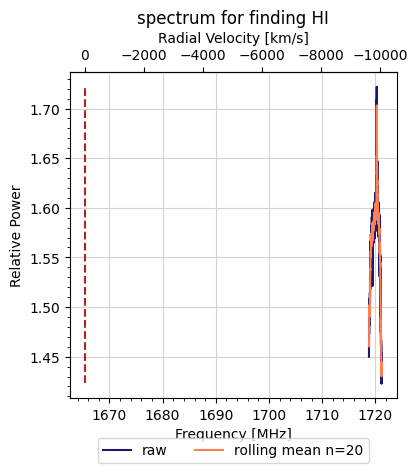

In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_excel('/Users/User/Downloads/spectrum_data_excel.xlsx' , header=None)
data.columns=("f", "x", "y", "p")
data.f = data.f + 300
# the rolling mean for power/intensity
data['rolp']=data['p'].rolling(15).mean()
max_p=data['rolp'].max()
max_f = data.loc[data['rolp'].idxmax(), 'f']
print(max_f)

#identyfying the rest frequency of the spectar line that is showing from the received data
#first try for atoms/molecules whose rest frequencies are known
# measuring units are MHz .
# HI (1420.4057) , OH (1612.2310 , 1665.4018, 1667.3590) , H20 (22235.0799) , NH3 (23694.5060 , 23722.6340, 23870.1300)
rest_values=[1420.4057, 1612.2310, 1665.4018, 1667.3590, 22235.0799, 23694.5060, 23722.6340, 23870.1300]
df=np.abs(max_f-rest_values)
if np.any(df<=0.5):
    condition=np.where(df<=0.5)[0][0]
    fo=rest_values[condition]
    print(fo)
    h=np.linspace(data['p'].min(), data['p'].max())
    x=np.full_like(h,fo)
else :
    print("there is no spectral line")




# find the radial velocity
def u(f):
    c=3*10**5
    return ((fo -f)/fo )*c

data['u']=u(data.f)

def inv(u):
    c=3*10**5
    return fo - (u/c)*fo



#visualise the data
fig, ax1=plt.subplots()
ax1.plot(data.f, data.p, color='midnightblue', label='raw')
ax1.plot(data.f , data.rolp, color='coral', label='rolling mean n=20')
ax1.plot(x,h, color='firebrick', linestyle='--', linewidth =1.5 )
ax1.set_xlabel("Frequency [MHz]")
ax1.set_ylabel("Relative Power")
ax1.yaxis.get_ticklocs(minor=True)
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set_box_aspect(1.0)

ax2=ax1.secondary_xaxis('top', functions=(u, inv))
ax2.set_xlabel("Radial Velocity [km/s]")
ax2.xaxis.get_ticklocs(minor=True)


plt.grid(True, linestyle ="solid", c="lightgrey")
plt.title("spectrum for finding HI")
plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.subplots_adjust(bottom=0.2)
plt.show()
